### Deep Learning algorithm to classify the cell_images for the for malaria desease.
- uninfected cells
- parasitized cells

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from matplotlib.pyplot import imshow

In [2]:
path = 'D:\DataWorld\Deep learning\cell_images'

In [3]:
path

'D:\\DataWorld\\Deep learning\\cell_images'

In [4]:
os.listdir(path)

['test', 'train']

In [5]:
test_path = path + '\\test'
train_path = path + '\\train'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'Thumbs.db', 'uninfected']

In [8]:
len(os.listdir(train_path+'\\parasitized'))

12479

In [9]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [10]:
firstcell=train_path+'\\parasitized\\'+os.listdir(train_path+'\\parasitized')[0]

imread(firstcell).shape

(148, 142, 3)

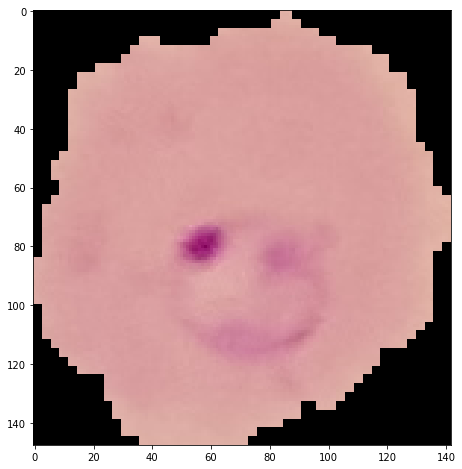

In [11]:
plt.figure(figsize=(10,8))
plt.imshow(imread(firstcell))

# Total number of images

In [12]:
len(os.listdir(train_path+'\\parasitized'))

12479

In [13]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [14]:
len(os.listdir(test_path+'\\uninfected'))

1300

In [15]:
len(os.listdir(test_path+'\\parasitized'))

1300


## Finding the size of each image in dataset
- Ideally size of each image should be same

In [16]:
# parasitized images

dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'\\parasitized'):
    dim1.append(imread(train_path+'\\parasitized\\'+image_filename).shape[0])
    dim2.append(imread(train_path+'\\parasitized\\'+image_filename).shape[1])
    


In [17]:
len(dim1), len(dim2)

(12479, 12479)

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


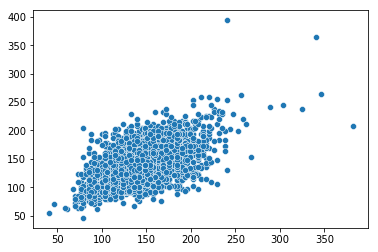

In [18]:
sns.scatterplot(dim1, dim2)

In [19]:
np.array(dim1).mean(),np.array(dim2).mean()

(134.360205144643, 133.66447632021797)

In [20]:
# uninfected imgaes

dim1 = []
dim2 = []

try:
    for image_filename in os.listdir(train_path+'\\uninfected'):
        dim1.append(imread(train_path+'\\uninfected\\'+image_filename).shape[0])
        dim2.append(imread(train_path+'\\uninfected\\'+image_filename).shape[1])
except:
    pass

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


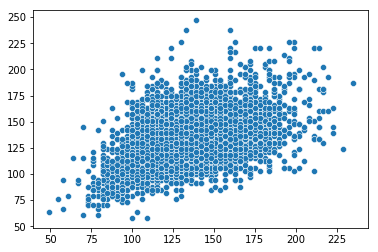

In [21]:
sns.scatterplot(dim1, dim2)

In [22]:
np.array(dim1).mean(),np.array(dim2).mean()

(131.64820899110507, 131.4041990544114)

In [23]:
# so new image shape would be...
image_shape = (130,130,3)

### Both datasets ( parasitezed and uninfected ) have images with variety of sizes. Their mean size comes out to be 130 by 130 for both. 

## Augmenting the data

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
img_gen = ImageDataGenerator(rotation_range = 20, 
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            shear_range = 0.1,
                            zoom_range = 0.1,
                            horizontal_flip = True,
                            fill_mode = 'nearest')

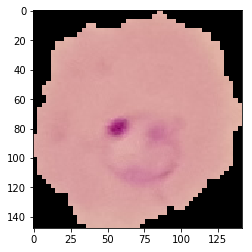

In [26]:
# Lets check one cell
par_cell = imread(firstcell)
plt.imshow(par_cell)

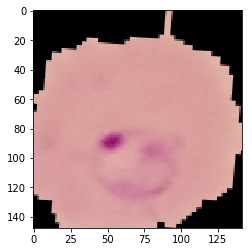

In [27]:
imshow(img_gen.random_transform(par_cell))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Conv2D,Dense, Dropout, Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation= 'sigmoid'))

model.compile( loss='binary_crossentropy', optimizer ='adam',
             metrics=['accuracy'])






In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping( monitor = 'val_loss', patience = 2)

In [33]:
batch_size = 16

In [34]:
train_img_gen = img_gen.flow_from_directory( train_path, 
                                            target_size =image_shape[:2],
                                           color_mode = 'rgb',
                                           batch_size= batch_size,
                                           class_mode = 'binary')

test_img_gen = img_gen.flow_from_directory( test_path, 
                                            target_size =image_shape[:2],
                                           color_mode = 'rgb',
                                           batch_size= batch_size,
                                           class_mode = 'binary',
                                          shuffle=False)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [35]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [36]:
# results = model.fit_generator(train_img_gen,epochs=20,
#                               validation_data = test_img_gen,
#                              callbacks=[early_stop])

In [38]:
model.metrics_names

[]

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model = load_model('img_classification_model.h5')

In [42]:
model.evaluate_generator(test_img_gen)

[0.6732531189918518, 0.6030769348144531]